In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
import pandas as pd
import numpy as np
#veri kümesi alındı. 
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/17K_Tweet.csv',engine='python',sep = ';',encoding='windows-1254')#csv içine aktarmak için sep parametresi kullanıldı.
print(data)
data.columns=['Tweet','Etiket']

x=data.iloc[:,0]
y=data.iloc[:,1]

tweets=[]
for i in x:
  tweets.append(i)
print(tweets[0])

      Ulan Wifi'ye bağlıyım ben. Ona bağlıyken Turkcell internet paketin bitti diye nasıl mesaj atabilir bana ya? Onu da mı ödeyelim  olumsuz
0      20 dk 1 GB internet 500 mb sadece kaşar turkce...                                                                              olumsuz
1      Ayrıca turkcell superonline reklamı kadar da k...                                                                              olumsuz
2                                 Turkcell çok pahalı ya                                                                              olumsuz
3                    Turkcell Kaş'ta internetin cekmiyor                                                                              olumsuz
4      Turkcell'in Allah belası versin demek isterdim...                                                                              olumsuz
...                                                  ...                                                                                  ...
17283 

In [14]:
!pip install glove_python
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
words=[]
for i in tweets:
  words.append(word_tokenize(i))

from glove import Corpus, Glove

corpus=Corpus()
corpus.fit(words,window=10)
glove=Glove(no_components=50, learning_rate=0.2)
glove.fit(corpus.matrix, epochs=50, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)
glove.save('glove.model')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Performing 50 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49


In [17]:
print(len(glove.dictionary))

50030


In [18]:
print(corpus.matrix)

  (0, 1)	3.125
  (0, 1)	5.0
  (0, 2)	2.200000047683716
  (0, 3)	0.8333333730697632
  (0, 3)	1.0
  (0, 4)	0.6944444179534912
  (0, 4)	3.885714292526245
  (0, 5)	0.20000000298023224
  (0, 6)	0.1666666716337204
  (0, 6)	0.1111111119389534
  (0, 7)	0.1428571492433548
  (0, 8)	0.125
  (0, 9)	7.080158710479736
  (0, 9)	9.309523582458496
  (0, 10)	2.5999999046325684
  (0, 10)	1.5
  (0, 12)	14.772221565246582
  (0, 12)	6.40079402923584
  (0, 16)	0.1666666716337204
  (0, 16)	0.3333333432674408
  (0, 18)	0.3333333432674408
  (0, 18)	0.1111111119389534
  (0, 19)	0.10000000149011612
  (0, 19)	1.8333333730697632
  (0, 21)	2.2833335399627686
  :	:
  (50006, 50007)	0.3333333432674408
  (50006, 50008)	0.125
  (50007, 50008)	0.20000000298023224
  (50010, 50011)	0.25
  (50011, 50012)	0.1111111119389534
  (50011, 50013)	0.10000000149011612
  (50012, 50013)	1.0
  (50014, 50015)	0.3333333432674408
  (50017, 50018)	1.0
  (50017, 50019)	0.3333333432674408
  (50017, 50020)	0.10000000149011612
  (50018, 50019)

In [19]:
with open("/content/drive/My Drive/Colab Notebooks/glove_deger.txt","w") as f:
  for word in glove.dictionary:
    f.write(word)
    f.write(" ")
    for i in range(0,20):
      f.write(str(glove.word_vectors[glove.dictionary[word]][i]))
      f.write(" ")
    f.write("\n")

In [24]:
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

token=Tokenizer()
token.fit_on_texts(x)
seq=token.texts_to_sequences(x)

yy=[]
for i in y:
  if i=='olumsuz':
    yy.append(0)
  elif i=='olumlu':
    yy.append(1)
  else:
    yy.append(2)

In [25]:
from keras.preprocessing.sequence import pad_sequences
pad_seq=pad_sequences(seq)
vocab_size=len(token.word_index)+1

In [27]:
import numpy as np
from numpy import array,asarray,zeros
from tqdm import tqdm
embedding_vector=dict()
f=open('/content/drive/My Drive/Colab Notebooks/glove_deger.txt',encoding='utf8')
for line in f:
  value=line.split()
  word=value[0]
  coef=asarray(value[1:],dtype='float32')
  embedding_vector[word]=coef
f.close()

In [28]:
embedding_matrix=np.zeros((vocab_size,20))
for word,i in tqdm(token.word_index.items()):
  embedding_value=embedding_vector.get(word)
  if embedding_value is not None:
    embedding_matrix[i]=embedding_value

100%|██████████| 42816/42816 [00:00<00:00, 646550.64it/s]


In [30]:
from keras.utils import np_utils
y=np_utils.to_categorical(yy)
print(y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [36]:
from sklearn.preprocessing import StandardScaler

x = pad_sequences(seq)

scaler = StandardScaler()
x = scaler.fit_transform(x)

from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=0)

Test Size=0.2 İken Sonuçlar

In [37]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM,Embedding

model=Sequential()
model.add(Embedding(vocab_size,20,weights=[embedding_matrix]))
model.add(LSTM(128))
model.add(Dense(3,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=20,epochs=25,validation_data=(x_test,y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 13830 samples, validate on 3458 samples
Epoch 1/25
13830/13830 [==============================] - 47s 3ms/step - loss: 0.5252 - accuracy: 0.7302 - val_loss: 0.5188 - val_accuracy: 0.7350
Epoch 2/25
13830/13830 [==============================] - 47s 3ms/step - loss: 0.4985 - accuracy: 0.7438 - val_loss: 0.5095 - val_accuracy: 0.7372
Epoch 3/25
13830/13830 [==============================] - 46s 3ms/step - loss: 0.4911 - accuracy: 0.7500 - val_loss: 0.5011 - val_accuracy: 0.7438
Epoch 4/25
13830/13830 [==============================] - 47s 3ms/step - loss: 0.4865 - accuracy: 0.7526 - val_loss: 0.5026 - val_accuracy: 0.7418
Epoch 5/25
13830/13830 [==============================] - 47s 3ms/step - loss: 0.4848 - accuracy: 0.7533 - val_loss: 0.4958 - val_accuracy: 0.7437
Epoch 6/25
13830/13830 [==============================] - 51s 4ms/step - loss: 0.4817 - accuracy: 0.7539 - val_loss: 0.4955 - val_accuracy: 0.7413
Epoch 7/25
13830/13830 [==============================] - 47s 3ms/ste

In [38]:
scores=model.evaluate(x_test,y_test)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

3458/3458 [==============================] - 2s 480us/step
Test loss: 0.5136019220201868
Test accuracy: 0.7409871220588684


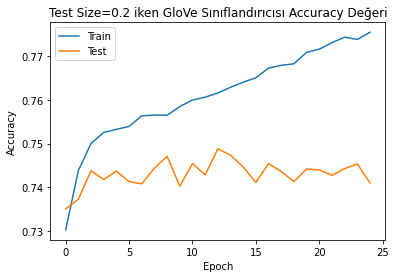

In [39]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Test Size=0.2 iken GloVe Sınıflandırıcısı Accuracy Değeri')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

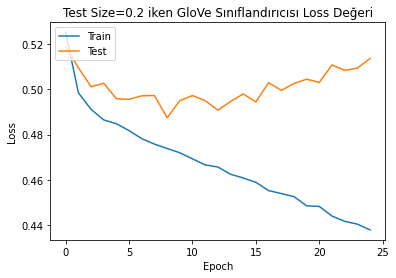

In [40]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Test Size=0.2 iken GloVe Sınıflandırıcısı Loss Değeri')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

Test Size=0.5 İken Sonuçlar

In [41]:
x_train, x_test,y_train,y_test=train_test_split(x, y, test_size=0.5, random_state=0)

In [42]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM,Embedding

model=Sequential()
model.add(Embedding(vocab_size,20,weights=[embedding_matrix]))
model.add(LSTM(128))
model.add(Dense(3,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=20,epochs=25,validation_data=(x_test,y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8644 samples, validate on 8644 samples
Epoch 1/25
8644/8644 [==============================] - 35s 4ms/step - loss: 0.5289 - accuracy: 0.7272 - val_loss: 0.5246 - val_accuracy: 0.7145
Epoch 2/25
8644/8644 [==============================] - 35s 4ms/step - loss: 0.4989 - accuracy: 0.7438 - val_loss: 0.5126 - val_accuracy: 0.7383
Epoch 3/25
8644/8644 [==============================] - 36s 4ms/step - loss: 0.4930 - accuracy: 0.7493 - val_loss: 0.5112 - val_accuracy: 0.7390
Epoch 4/25
8644/8644 [==============================] - 35s 4ms/step - loss: 0.4878 - accuracy: 0.7505 - val_loss: 0.5010 - val_accuracy: 0.7434
Epoch 5/25
8644/8644 [==============================] - 35s 4ms/step - loss: 0.4829 - accuracy: 0.7530 - val_loss: 0.5042 - val_accuracy: 0.7401
Epoch 6/25
8644/8644 [==============================] - 35s 4ms/step - loss: 0.4822 - accuracy: 0.7517 - val_loss: 0.4999 - val_accuracy: 0.7464
Epoch 7/25
8644/8644 [==============================] - 34s 4ms/step - loss: 0.478

In [43]:
scores=model.evaluate(x_test,y_test)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

8644/8644 [==============================] - 4s 496us/step
Test loss: 0.5046346522505666
Test accuracy: 0.7480334639549255


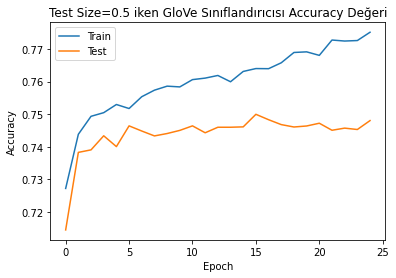

In [46]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Test Size=0.5 iken GloVe Sınıflandırıcısı Accuracy Değeri')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

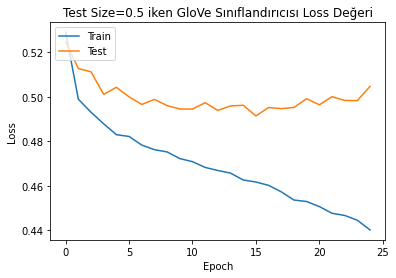

In [47]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Test Size=0.5 iken GloVe Sınıflandırıcısı Loss Değeri')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

Text Size=0.7 İken Sonuçlar

In [48]:
x_train, x_test,y_train,y_test=train_test_split(x, y, test_size=0.7, random_state=0)

In [49]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM,Embedding

model=Sequential()
model.add(Embedding(vocab_size,20,weights=[embedding_matrix]))
model.add(LSTM(128))
model.add(Dense(3,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=20,epochs=25,validation_data=(x_test,y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 5186 samples, validate on 12102 samples
Epoch 1/25
5186/5186 [==============================] - 26s 5ms/step - loss: 0.5444 - accuracy: 0.7258 - val_loss: 0.5201 - val_accuracy: 0.7317
Epoch 2/25
5186/5186 [==============================] - 25s 5ms/step - loss: 0.5075 - accuracy: 0.7410 - val_loss: 0.5165 - val_accuracy: 0.7304
Epoch 3/25
5186/5186 [==============================] - 25s 5ms/step - loss: 0.5019 - accuracy: 0.7429 - val_loss: 0.5064 - val_accuracy: 0.7418
Epoch 4/25
5186/5186 [==============================] - 25s 5ms/step - loss: 0.4954 - accuracy: 0.7475 - val_loss: 0.5071 - val_accuracy: 0.7399
Epoch 5/25
5186/5186 [==============================] - 25s 5ms/step - loss: 0.4929 - accuracy: 0.7492 - val_loss: 0.5021 - val_accuracy: 0.7420
Epoch 6/25
5186/5186 [==============================] - 25s 5ms/step - loss: 0.4893 - accuracy: 0.7484 - val_loss: 0.5005 - val_accuracy: 0.7312
Epoch 7/25
5186/5186 [==============================] - 25s 5ms/step - loss: 0.48

In [50]:
scores=model.evaluate(x_test,y_test)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

12102/12102 [==============================] - 6s 481us/step
Test loss: 0.49773353999202025
Test accuracy: 0.7478379011154175


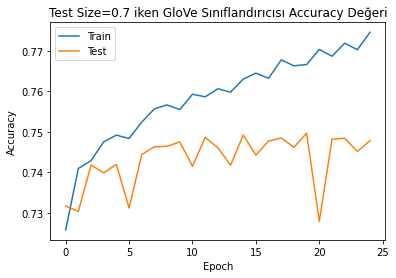

In [51]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Test Size=0.7 iken GloVe Sınıflandırıcısı Accuracy Değeri')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

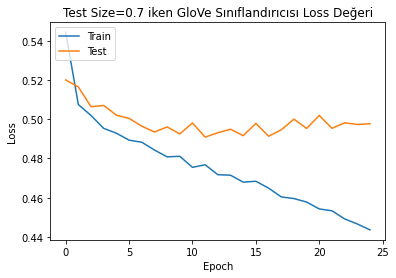

In [52]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Test Size=0.7 iken GloVe Sınıflandırıcısı Loss Değeri')
plt.legend(['Train','Test'], loc='upper left')
plt.show()